In [1]:
import re
import spacy
import gensim
import pandas as pd
from gensim import models
from nltk.stem import SnowballStemmer
from sklearn.datasets import fetch_20newsgroups
from topic_modeling_20newsgroups import preprocessing, tokenize, do_stem, lemmatize
# Used later in the document
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
# import pickle to save and load the dictionary and the corpus
import pickle

Topic Modeling Fetch_20newsgroups

Jupyter Notebook for topic modeling the Fetch_20newsgroups from sklearn.
In this script I will be using LDA as topic modeling algorithm.
I will use spacy and gensim, but I won't use NLTK for preprocessing
the text. 

I usually use nltk for all the text preprocessing, but I willuse
other libraries such as spacy and gensim to learn new ways of
preprocessing the text. For lemmatizing I will use spacy, but if
stemming is selected, I will use nltk. I've found that nltk stemmer
and lemmatizer are better thatn spacy's one, because nltk has
better algorithms/rules for that. Also it could be a nice option to use
stanza, a NLP package made by Stanford University.

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle=True)

# To see the complete information about the dataset, uncommnet the next line.
# print(train.DESCR)

# There are twenty classes in this dataset.
print('Number of targets for the fetch_20newsgroup:', len(newsgroups_train.target_names))
print('The targets are:', newsgroups_train.target_names)
print('\n\nExample of news in this problem:')
print(newsgroups_train.data[0])

# Take news data and target
train_text, y_train = newsgroups_train.data, newsgroups_train.target
test_text, y_test = newsgroups_test.data, newsgroups_test.target

Number of targets for the fetch_20newsgroup: 20
The targets are: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Example of news in this problem:
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model n

**Preprocess the data**

In [4]:
t_text = preprocessing(train_text)
# test_text = preprocessing(test_text)

**Prepare the vocabulary and the corpus for training the ldamodel.**

In [5]:
id2word = gensim.corpora.Dictionary(t_text)
corpus = [id2word.doc2bow(text) for text in t_text]

**Train the topic modeling model**

Here we have to use the corpus and the dictionary we've prepared. In the *num_topics* we use 20, because this dataset has 20 different classes. *chunksize* refes to the number of documents used in each training chunk. *passes* refers to the total number of training passes. 

*alpha* is set to auto, as well as *eta* (which is by default as auto), the value will be 1.0/num_topics.

In [6]:
lda_model = models.ldamodel.LdaModel(
        corpus=corpus,
        id2word=id2word,
        num_topics=20,
        random_state=42,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )

Once the model is fitted, we can show the 20 topics, and the most important words in it. Here we use the function *print_topics*, that by default shows the 10 most important words for each topic.

In [7]:
lda_model.print_topics()

[(0,
  '0.823*"*" + 0.006*"!" + 0.004*"circuit" + 0.004*"baseball" + 0.002*"captain" + 0.002*"consequence" + 0.002*"    " + 0.002*"consult" + 0.002*"funny" + 0.002*"Ted"'),
 (1,
  '0.084*"\n    " + 0.082*"\n " + 0.071*"," + 0.053*"x" + 0.049*";" + 0.048*"%" + 0.037*""" + 0.035*"/" + 0.033*"]" + 0.031*"["'),
 (2,
  '0.243*"\n   " + 0.170*"\n  " + 0.063*"\n\n   " + 0.048*"\n\n  " + 0.035*"}" + 0.014*"\n          " + 0.014*"telnet" + 0.009*"{" + 0.009*"message" + 0.006*"implementation"'),
 (3,
  '0.839*"=" + 0.019*"-" + 0.011*"|" + 0.006*"@" + 0.004*"Baker" + 0.002*"," + 0.002*"||" + 0.002*"w" + 0.001*"amazing" + 0.001*"!"'),
 (4,
  '0.394*"#" + 0.015*"ATI" + 0.014*"DoD" + 0.007*"pixel" + 0.006*"ex" + 0.004*"ultra" + 0.004*"BC" + 0.002*"adjust" + 0.002*"{" + 0.002*"231"'),
 (5,
  '0.127*"." + 0.123*"\n" + 0.117*"," + 0.059*" " + 0.023*""" + 0.019*"\n\n" + 0.009*"?" + 0.007*")" + 0.007*"(" + 0.006*"think"'),
 (6,
  '0.013*"simm" + 0.004*"Plymouth" + 0.003*"simms" + 0.001*"octopus" + 0.000*

In [8]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We have shown each topic and the 10 most important words. In this way we can know a little about each topic, and what are they about by the targets we have. 

The topic 10 does not tells anthing about the topic, text may need more cleaning before being processed, and this happen as well in the topics 8 and 9. Nevertheless the topic 18 goes about politics, or the topic 19 that goes about science, in concrete about electronics and crypt. In the other hand, the topic 0 is about sports.

As the model seems to be not detecting some topics well, we may want to get the coherence of the topics detected, so we know if we need to go some steps before or we can continue. To do so, we will use the CoherenceModel from gensim.

In [9]:
coherence = models.CoherenceModel(model=lda_model, texts=t_text, dictionary=id2word, 
                                  coherence='u_mass', corpus=corpus)

# We can use 'c_v' and 'u_mass' among other. 'c_v' goes between 0 and 1, and 'u_mass' goes between -14, 14.

print(coherence.get_coherence())

-4.460689981510683


As 'u_mass' goes between -14,14, we should get a better coherence than -4.46, at least more close to 0. This happens because we should have clean the text more, deleting '(', '\n', so we could get better topics.

To clean the text, we could use some aditional functions using the re package.

In [10]:
import re

In [60]:
# This functions shold be used before tokenizing the text
def cleaning_functions(text):
    """Function to clean the text. This function delete
    emails, new line character, etc.
    Args:
        text(list): text to clean.
    Returns:
        list: text cleaned.
    """
    text = [news.lower() for news in text]
    # Removing emails. We could use a better regular expression
    # but for this case this is enough.
    text = [re.sub('\S*@\S*\s', '', news) for news in text]
    # Removing new line character
    text = [re.sub('\s+', ' ', news) for news in text]
    # Removing punctuation
    text = [re.sub('[^\w\s]', '', news) for news in text]
    return text

<>:13: DeprecationWarning: invalid escape sequence \S
<>:15: DeprecationWarning: invalid escape sequence \s
<>:17: DeprecationWarning: invalid escape sequence \w
<>:13: DeprecationWarning: invalid escape sequence \S
<>:15: DeprecationWarning: invalid escape sequence \s
<>:17: DeprecationWarning: invalid escape sequence \w
<ipython-input-60-4fde0fc2f956>:13: DeprecationWarning: invalid escape sequence \S
  text = [re.sub('\S*@\S*\s', '', news) for news in text]
<ipython-input-60-4fde0fc2f956>:15: DeprecationWarning: invalid escape sequence \s
  text = [re.sub('\s+', ' ', news) for news in text]
<ipython-input-60-4fde0fc2f956>:17: DeprecationWarning: invalid escape sequence \w
  text = [re.sub('[^\w\s]', '', news) for news in text]


Now we will clean the data and retrain the lda_model.

In [75]:
train_text = newsgroups_train.data
training_text = cleaning_functions(train_text)

In [76]:
text = preprocessing(training_text)

In [78]:
text[0]

['s',
 'thing',
 'subject',
 'car',
 'nntppostinghost',
 'rac3wamumdedu',
 'organization',
 'university',
 'maryland',
 'college',
 'park',
 'line',
 '15',
 'wonder',
 'enlighten',
 'car',
 'see',
 'day',
 '2door',
 'sport',
 'car',
 'look',
 'late',
 '60',
 'early',
 '70',
 'call',
 'bricklin',
 'door',
 'small',
 'addition',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'tellme',
 'model',
 'engine',
 'spec',
 'year',
 'production',
 'car',
 'history',
 'info',
 'funky',
 'look',
 'car',
 'email',
 'thank',
 ' ',
 'il',
 ' ',
 'bring',
 'neighborhood',
 'lerxst',
 ' ']

In [79]:
id2word = gensim.corpora.Dictionary(text)
corpus = [id2word.doc2bow(news) for news in text]

In [82]:
lda_model = models.ldamodel.LdaModel(
        corpus=corpus,
        id2word=id2word,
        num_topics=20,
        random_state=42,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )

In [83]:
coherence = models.CoherenceModel(model=lda_model, texts=text, dictionary=id2word, 
                                  coherence='c_v', corpus=corpus)

# We can use 'c_v' and 'u_mass' among other. 'c_v' goes between 0 and 1, and 'u_mass' goes between -14, 14.

print(coherence.get_coherence())

0.4766173321696588


Also we can get the perplexity of the model. This will show us how good the model is. The lower the value, the better the model is. This measure can be calculated with the lda_model we've trained.

In [84]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -14.552105741881524


If we print the topics now, we will see a better defined topics.

In [85]:
lda_model.print_topics()

[(0,
  '0.125*"israel" + 0.087*"israeli" + 0.038*"arab" + 0.038*"jew" + 0.028*"jewish" + 0.022*"jason" + 0.020*"terrorist" + 0.019*"craig" + 0.018*"math" + 0.017*"jews"'),
 (1,
  '0.031*"soldier" + 0.030*"armenian" + 0.029*"village" + 0.024*"turkish" + 0.021*"muslim" + 0.018*"turk" + 0.018*"attack" + 0.017*"occupy" + 0.017*"war" + 0.016*"kill"'),
 (2,
  '0.068*"x" + 0.049*" " + 0.028*"file" + 0.025*"program" + 0.016*"use" + 0.014*"available" + 0.013*"entry" + 0.012*"code" + 0.012*"information" + 0.011*"image"'),
 (3,
  '0.030*"bio" + 0.026*"milwaukee" + 0.024*"pitch" + 0.019*"350" + 0.018*"staff" + 0.017*"scsi2" + 0.015*"hitter" + 0.013*"inning" + 0.013*"wisconsin" + 0.008*"scsi1"'),
 (4,
  '0.122*" " + 0.030*"line" + 0.029*"subject" + 0.028*"organization" + 0.027*"  " + 0.017*"write" + 0.013*"university" + 0.012*"nntppostinghost" + 0.012*"article" + 0.010*"m"'),
 (5,
  '0.010*"state" + 0.008*"use" + 0.007*"space" + 0.007*"new" + 0.007*"system" + 0.006*"gun" + 0.006*"work" + 0.006*"num

After cleaning the text we have a better coherence, and better topics detected, so this will be the model we will analyze. As we got a good model, we could save it for future uses. We can use the save function to save the model as a pickle object.

In [19]:
# lda_model.save('lda_fetch20news')

To load the model, we only have to use the load function.

In [20]:
# aux = models.ldamodel.LdaModel.load('lda_fetch20news')

To visualize the model, and understand more the topics we've extracted, we will use the pyLDAvis package, which is compatible with the LDA model from gensim. It prints interative chart.

In [86]:
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

In [87]:
# Use enable_notebook to use the package
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus=corpus, dictionary=id2word)
vis # uncomment to show the interative chart

/home/alberto/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/usr/lib/python3/dist-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/usr/lib/python3/dist-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/usr/lib/python3/dist-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/usr/lib/python3/dist-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.404699  0.022575       1        1  32.970957
15    -0.397963  0.082239       2        1  27.242626
5     -0.343151  0.078759       3        1  17.553213
2     -0.248268  0.031917       4        1   6.301901
8     -0.051841 -0.416391       5        1   3.150024
19    -0.113405 -0.033457       6        1   2.936114
18    -0.057446 -0.000023       7        1   2.171190
11    -0.013780 -0.122871       8        1   2.081925
1      0.029596  0.055974       9        1   1.446440
17     0.057399 -0.014135      10        1   1.414287
9      0.138196  0.020899      11        1   0.542672
13     0.141259  0.031682      12        1   0.519915
0      0.126687  0.033127      13        1   0.492617
10     0.143513  0.032148      14        1   0.415179
14     0.160879  0.032722      15        1   0.239891
3      0.164125  0.033016      16        1   0.171586
12     0.164218  0.033844      17        1   0.165214
7      0.165488  0.033094      18        1   0.149763
16     0.169194  0.032589      19        1   0.031821
6      0.169997  0.032290      20        1   0.002664, topic_info=          Term         Freq         Total Category  logprob  loglift
824          _  48590.00000  48590.000000  Default  30.0000  30.0000
0               91955.00000  91955.000000  Default  29.0000  29.0000
629          1   7672.00000   7672.000000  Default  28.0000  28.0000
1604         x   7653.00000   7653.000000  Default  27.0000  27.0000
844          2   5425.00000   5425.000000  Default  26.0000  26.0000
...        ...          ...           ...      ...      ...      ...
24        late      0.00045    748.991521  Topic20 -11.5638  -3.7907
26        line      0.00045  18768.406363  Topic20 -11.5638  -7.0119
27        look      0.00045   4340.550359  Topic20 -11.5638  -5.5478
28    maryland      0.00045    163.951530  Topic20 -11.5638  -2.2716
29       model      0.00045   1061.899962  Topic20 -11.5638  -4.1398

[888 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.776062         
0         2  0.156326         
0         3  0.007939         
0         4  0.059670         
103       1  0.924640         
...     ...       ...      ...
49        1  0.462862     year
49        2  0.228292     year
49        3  0.308765     year
2056     11  0.986493  zealand
2411     12  0.959786     zx11

[1078 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 16, 6, 3, 9, 20, 19, 12, 2, 18, 10, 14, 1, 11, 15, 4, 13, 8, 17, 7])

We could end the analysis here, just using pyLDAvis to understad how the topics have been formed, but we're going further. 

We know we had to look for 20 targets, but what if we don't know about the topics we're searching?? We have to search for the number of topics that adapt better to the problem.

In [23]:
def compute_coherence_by_model(dictionary, corpus, text, start=2, limit=20, step=1):
    """Function that computes the c_v coherence for multiple LDA models while changing
    the number of topics.
    Args:
        dictionary: Gensim dictionary
        corpus: Gensim corpus
        text (list): text preprocessed
        start (int, optional): first number of topics to test
        limit (int, optional): max number of topics to test
        step (int, optional): number of steps while increasing the topics
    Returns:
        lda_model_list: list with the lda models
        coherence_values_list: list with the coherence values for the models
    """
    lda_model_list = []
    coherence_values_list = []
    for i in range(start, limit, step):
        lda_model = models.ldamodel.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=i,
            per_word_topics=True,
            alpha='auto',
            passes=10,
            chunksize=100
        )
        lda_model_list.append(lda_model)
        cv = models.CoherenceModel(lda_model, texts=text, corpus=corpus, 
                                   dictionary=dictionary, coherence='c_v')
        coherence_values_list.append(cv.get_coherence())
        
    return lda_model_list, coherence_values_list

In [88]:
model_list, coherence_values = compute_coherence_by_model(dictionary=id2word, corpus=corpus, text=text,
                                                         step=5, limit=24)

We can print the evolution of the coherence score as we increse the number of topics.

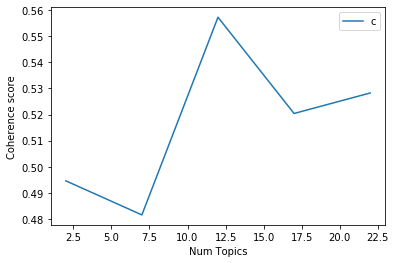

In [90]:
limit=24; start=2; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [91]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [92]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 5))

Num Topics = 2  has Coherence Value of 0.49456
Num Topics = 7  has Coherence Value of 0.48148
Num Topics = 12  has Coherence Value of 0.55733
Num Topics = 17  has Coherence Value of 0.5204
Num Topics = 22  has Coherence Value of 0.52826


We have 20 targets, but as we can see in the target names, there are 7 main topics, and there are some subtopics for each main topic. That is why we get a similar coherence score with 7 and with 20 topics with the LDA, and we're getting even better coherence with 7 topics than with 17 e.g.

We can also use KMeans, from scikit-learn to try to detect also the clusters and then use LDA to study the clusters.

Now we will look to find the most important document for each topic, but before let's find the dominant topic in each sentence.

In [93]:
def topics_in_sentence(lda_model, corpus, text):
    ret = pd.DataFrame()
    # Get the main topic in each document
    for i, row in enumerate(lda_model.get_document_topics(corpus)):
        # Sort the probabilities of the topics in the document
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Iterate over the topics and it's probability
        for j, (topic_num, topic_prob) in enumerate(row):
            # Get the topic keywords for the topic.
            if j==0:
                word_probs = lda_model.show_topic(topic_num)
                topic_keywords = ', '.join([word for (word, word_prob) in word_probs])
                ret = ret.append(pd.Series([int(topic_num), round(topic_prob, 4), topic_keywords]), ignore_index=True)
            else:
                break
    
    ret.columns = ['Dominant_topic', 'Topic_contrib', 'Topic_keywords']
    
    # Add text to the DF.
    ret['Text'] = text
    
    return ret

In [94]:
topics_sent_df_keywords = topics_in_sentence(lda_model, corpus, text)

In [95]:
topics_sent_df = topics_sent_df_keywords.reset_index()
topics_sent_df.columns = ['Document', 'Dominant_topic', 'Topic_contrib', 'Topic_keywords', 'Text']

In [96]:
topics_sent_df.head()

,Document,Dominant_topic,Topic_contrib,Topic_keywords,Text
0,0,4.0,0.6383,", line, subject, organization, , write, uni...","[s, thing, subject, car, nntppostinghost, rac3..."
1,1,19.0,0.3918,"drive, window, card, driver, mac, system, cpu,...","[guy, kuo, subject, si, clock, poll, , final,..."
2,2,4.0,0.4166,", line, subject, organization, , write, uni...","[thoma, e, willi, subject, pb, question, organ..."
3,3,4.0,0.6118,", line, subject, organization, , write, uni...","[joe, green, subject, weitek, p9000, , organi..."
4,4,4.0,0.4021,", line, subject, organization, , write, uni...","[jonathan, mcdowell, subject, shuttle, launch,..."


Most representative document for each topic

In [97]:
document_mtopic = pd.DataFrame()

In [98]:
document_mtopic_groups = topics_sent_df_keywords.groupby('Dominant_topic')
for i, group in document_mtopic_groups:
    document_mtopic = pd.concat([document_mtopic, group.sort_values(['Topic_contrib'], ascending=[0]).head(1)], axis=0)

# Reset index
document_mtopic.reset_index(drop=True, inplace=True)https://www.twitch.tv/ibai
document_mtopic.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
document_mtopic

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,1.0,0.6946,"soldier, armenian, village, turkish, muslim, t...","[serdar, argic, subject, armenian, slaughter, ..."
1,2.0,0.6984,"x, , file, program, use, available, entry, co...","[landon, c, noll, subject, 10th, international..."
2,4.0,0.9152,", line, subject, organization, , write, uni...","[john, huber, subject, nhl, team, captain, org..."
3,5.0,0.7530,"state, use, space, new, system, gun, work, num...","[jon, leech, subject, space, faq, 1115, , upc..."
4,8.0,0.9265,"_, frame, , radius, , , nick, down...","[frode, kvam, subject, ftpsite, wavfile, organ..."
5,10.0,0.3971,"engine, telnet, alan, online, oil, guest, heat...","[john, nagle, subject, nuclear, site, cool, to..."
6,11.0,0.9256,"1, 2, 0, 3, 4, 5, 7, 6, 8, 10","[rocket, subject, nhl, playoff, leader, april,..."
7,13.0,0.4426,"t, bike, al, rider, dog, nec, honda, arizona, ...","[chris, behanna, subject, riceburner, respect,..."
8,15.0,0.8637,"nt, , people, think, god, know, say, write, l...","[geno, , subject, arrogance, christian, reply..."
9,18.0,0.4757,"key, chip, sale, phone, clipper, encryption, s...","[peter, wayner, subject, old, key, registratio..."


We can see that with the model has only detected that there are 12 relevant topics. From the coherence study, we know that there are some topics that may overlap, and, because of this, there are 12 relevant topics instead of the 20 we have in the target.

Now let's get the topic distribution across the documents.

TODO: Fix this last step.

In [101]:
# Number of Documents for Each Topic
topic_counts = topics_sent_df_keywords['Dominant_topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 5)

# Topic Number and Keywords
topic_num_key = topics_sent_df_keywords[['Dominant_topic', 'Topic_keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat((topic_num_key, topic_counts, topic_contribution), axis=1, join="inner")

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
1.0,19.0,"drive, window, card, driver, mac, system, cpu,...",57,0.00504
2.0,4.0,", line, subject, organization, , write, uni...",56,0.00495
4.0,4.0,", line, subject, organization, , write, uni...",7708,0.68128
5.0,15.0,"nt, , people, think, god, know, say, write, l...",552,0.04879
8.0,4.0,", line, subject, organization, , write, uni...",300,0.02652
10.0,4.0,", line, subject, organization, , write, uni...",2,0.00018
11.0,15.0,"nt, , people, think, god, know, say, write, l...",17,0.00150
13.0,5.0,"state, use, space, new, system, gun, work, num...",4,0.00035
15.0,15.0,"nt, , people, think, god, know, say, write, l...",2529,0.22353
18.0,5.0,"state, use, space, new, system, gun, work, num...",38,0.00336


Now we have the number of documents for each topic. And we can see the relevant keywords of each topic and the relevance of each one.